## **Introduction**
Have you ever wondered about the trends for hotel bookings? How long people stay? How often people cancel? What are the busiest months? In this analysis we explore a large dataset to examine these questions.

## **Methodology**

In this project, We used Python's most useful libraries like Pandas, Matplotlib, Seaborn etc. to examine, cleaning and to analyse the “Hotel Booking Analysis” dataset.

In [350]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [351]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [352]:
# load the csv file
file_path = '/content/drive/MyDrive/MindX/XD36/Hotel Booking Analyst/'
df = pd.read_csv(file_path + 'hotel_bookings.csv')

In [353]:
# Before cleaning the data total number of rows and columns in data
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [354]:
# Checking first 5 rows in data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [355]:
# Checking last 15 rows in data
df.tail(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119375,City Hotel,0,200,2017,August,35,30,1,4,2,...,No Deposit,16.0,NaN,0,Transient,85.50,0,1,Check-Out,4/9/2017
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,4/9/2017
119377,City Hotel,0,185,2017,August,35,30,1,4,2,...,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,4/9/2017
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,4/9/2017
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,4/9/2017
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,4/9/2017
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,5/9/2017
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,5/9/2017
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,6/9/2017
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,6/9/2017


## **Dataset**
This dataset contains information on records for client stays at hotels. More specifically, it contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. For the purpose of this post, We only focused on some of these variables to examine.

In [356]:
# Checking basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [357]:
# Exploring descriptive statistical parameter
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Data Cleaning**

In [358]:
#Handling outlier
df = df[df['adr']<5000]

In [359]:
# Checking the total number of null values in every columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [360]:
# Column-wise null percentage
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [361]:
# Replace the null values of “children” column by 0.
df['children'].fillna(0, inplace = True)

In [362]:
# Replace the null values in the “agent” column by mean of that column.
df['agent'].fillna(df['agent'].mean(), inplace = True)

In [363]:
# Drop the column "company" as it has more than 94% data missing
df = df.drop(['company'],axis=1)

In [364]:
# Country has 488 rows or 0.41% data missing which is negligible, hence we will remove these data.
df = df.dropna(axis=0)

In [365]:
# Ensure that all the null values get replace and there is no null values in any column
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [366]:
# After cleaning the data total number of rows and columns in data
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 118901 rows and 31 columns.


In [367]:
# Convert reservation_status_date to dtype datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], dayfirst=True)

In [368]:
# List of categorical/object column
print(f"In our DataFrame categorical columns are: {df.select_dtypes(include=['object']).columns.tolist()}")

In our DataFrame categorical columns are: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [369]:
# List of numerical column
print(f"In our DataFrame numerical columns are: {df.select_dtypes(include=['int','float']).columns.tolist()}")

In our DataFrame numerical columns are: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [370]:
#Check unique object values
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

## **Exploratory Analysis and Visualization**

### Overview of Canceled bookings

In [371]:
# Counting the total number of values in 'is_canceled' column
is_canceled_counts = df['is_canceled'].value_counts()
is_canceled_counts

is_canceled
0    74745
1    44156
Name: count, dtype: int64

is_canceled
0    0.628632
1    0.371368
Name: proportion, dtype: float64


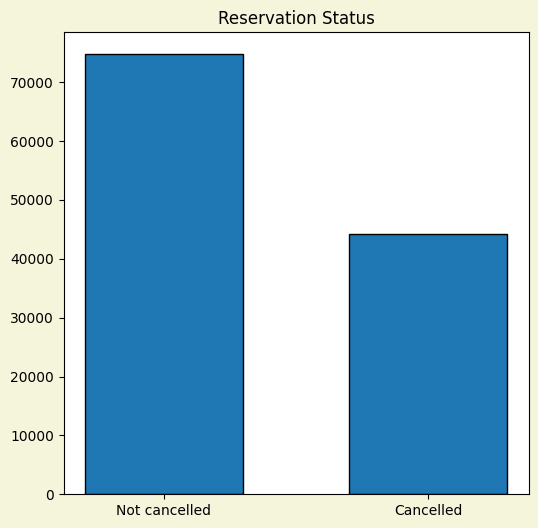

In [372]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
plt.figure(figsize = (6,6),facecolor="#f5f5dc")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6)
plt.show()

*   From this graph, We got very meaningful insights that 37% of bookings got canceled Whereas 63% of customers did check-in.

### Relationship between Previous Cancellations and current Cancellations

In [373]:
# Finding the correlation between is_canceled and previous_cancellations
df[['is_canceled','previous_cancellations']].corr() * 100

,is_canceled,previous_cancellations
is_canceled,100.000000,10.991623
previous_cancellations,10.991623,100.000000


Correlation is only 10.9914%

In [374]:
# Sort previous cancellations by index (cancellation times)
df['previous_cancellations'].value_counts().sort_index()

previous_cancellations
0     112454
1       6017
2        113
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: count, dtype: int64

In [375]:
# Let's take a look customer cancellation rate for customers who cancelled more than 10 times before!
df[df['previous_cancellations'] > 10]['is_canceled'].mean() * 100

85.55555555555556

In [376]:
# Convert index to a list
a = df['previous_cancellations'].value_counts().index.to_list()
# Sort the list by ascending order
a.sort()
a

[0, 1, 2, 3, 4, 5, 6, 11, 13, 14, 19, 21, 24, 25, 26]

In [377]:
# Finding the current cancellation rate according to their previous cancellation
b = []
for ccltime in a:
    b.append(round(df[df['previous_cancellations']==ccltime]['is_canceled'].mean() * 100 , 2))
print(b)

[34.0, 94.58, 32.74, 30.77, 22.58, 10.53, 31.82, 28.57, 91.67, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [378]:
# Creating a dictionary with keys as previous_cancellation and values as current_cancellation_rate
cancellation_rate = {'previous_cancellation': a, 'current_cancellation_rate': b}
cancellation_rate_data = pd.DataFrame(cancellation_rate)
cancellation_rate_data

,previous_cancellation,current_cancellation_rate
0,0,34.00
1,1,94.58
2,2,32.74
3,3,30.77
4,4,22.58
5,5,10.53
6,6,31.82
7,11,28.57
8,13,91.67
9,14,100.00


Text(0, 0.5, 'Current Cancellation Rate (%)')

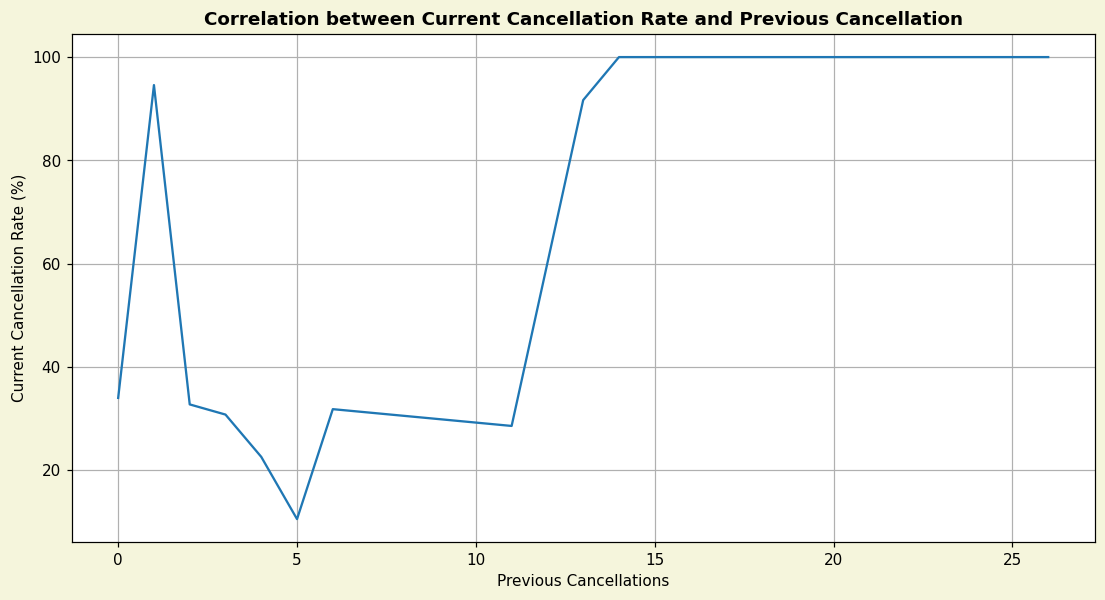

In [379]:
# Plotting the graph depicting Correlation between Current Cancellation Rate and Previous Cancellation using seaborn
plt.figure(figsize = (12,6), dpi=110,facecolor="#f5f5dc")
sns.lineplot(x = 'previous_cancellation', y = 'current_cancellation_rate', data = cancellation_rate_data)
plt.grid()
plt.title('Correlation between Current Cancellation Rate and Previous Cancellation', weight='bold')
plt.xlabel('Previous Cancellations')
plt.ylabel('Current Cancellation Rate (%)')

*   According to graph, when customer previouslly had one time hotel reservation cancellation, 94.58% of them cancelled again.
*   Cancellation rate for customers who have canceled more than 10 times before: 85.56%



### Deposit Types

In [380]:
# Percentage distribution of Deposite type
df['deposit_type'].value_counts(normalize=True) * 100

deposit_type
No Deposit    87.608178
Non Refund    12.255574
Refundable     0.136248
Name: proportion, dtype: float64

Text(0.5, 0, 'Deposit Type')

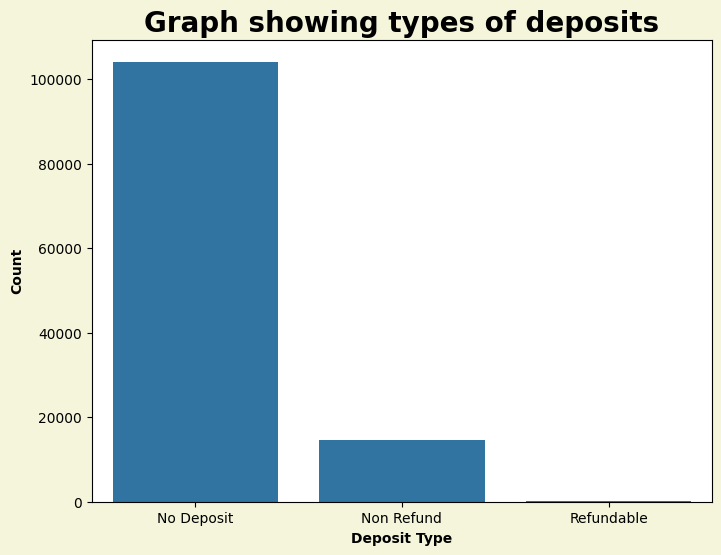

In [381]:
# Plotting the graph showing the count of different types of deposit
plt.figure(figsize = (8,6),facecolor="#f5f5dc")
sns.countplot(data = df, x = 'deposit_type', order = df['deposit_type'].value_counts().index)
plt.title('Graph showing types of deposits', fontsize = 20 , weight= 'bold')
plt.ylabel('Count' , weight= 'bold')
plt.xlabel('Deposit Type', weight= 'bold' )

*   More than 85% of hotels have "No Deposit" policy.

### What is the percentage of booking for each year?

In [382]:
# Calculate total number of bookings acorss different years
year_counts = df['arrival_date_year'].value_counts().sort_index()
year_counts

arrival_date_year
2015    21863
2016    56434
2017    40604
Name: count, dtype: int64

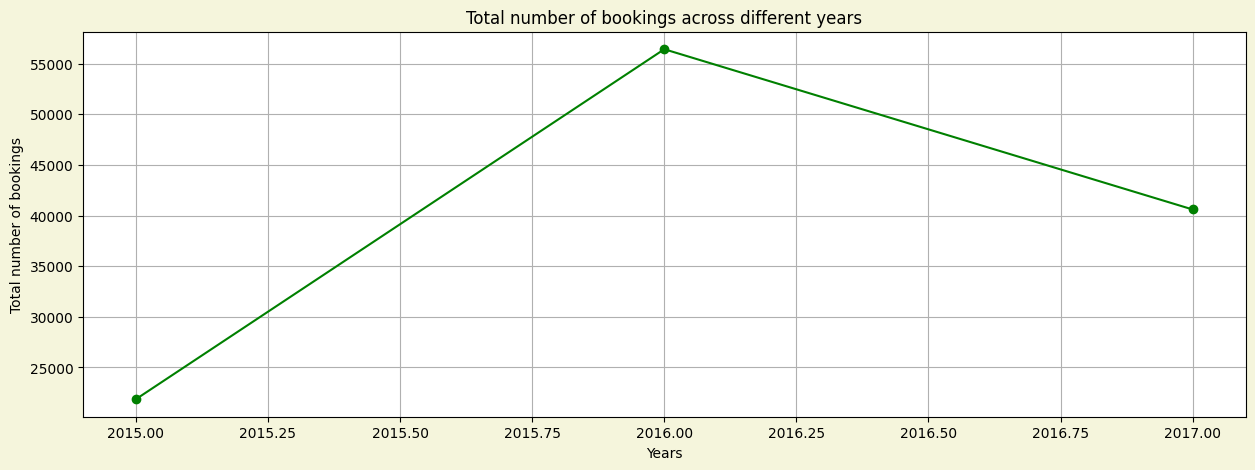

In [383]:
# Plot the graph for years vs total bookings
plt.rcParams['figure.figsize'] = (15, 5)
fig = plt.figure(facecolor='#f5f5dc')
ax = fig.add_subplot(111)
year_counts.plot(kind='line',color='green',marker='o')
ax.grid()
ax.set_title('Total number of bookings across different years')
ax.set_ylabel('Total number of bookings')
ax.set_xlabel('Years')
plt.show()

*   This plot clearly represents that bookings in year 2016 was highest compared to other years which is near about more than 56500. In year 2017 bookings fell down as compared to last year i.e. 40600 but this value was still quite better than it was in 2015 only about 22000.

In [384]:
# Percentage distribution of total booking across different years
df['arrival_date_year'].value_counts(normalize=True) * 100

arrival_date_year
2016    47.463015
2017    34.149418
2015    18.387566
Name: proportion, dtype: float64

<ipython-input-385-c213c342029e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_date_year', data=df, palette='colorblind')


Text(0, 0.5, 'Total Bookings')

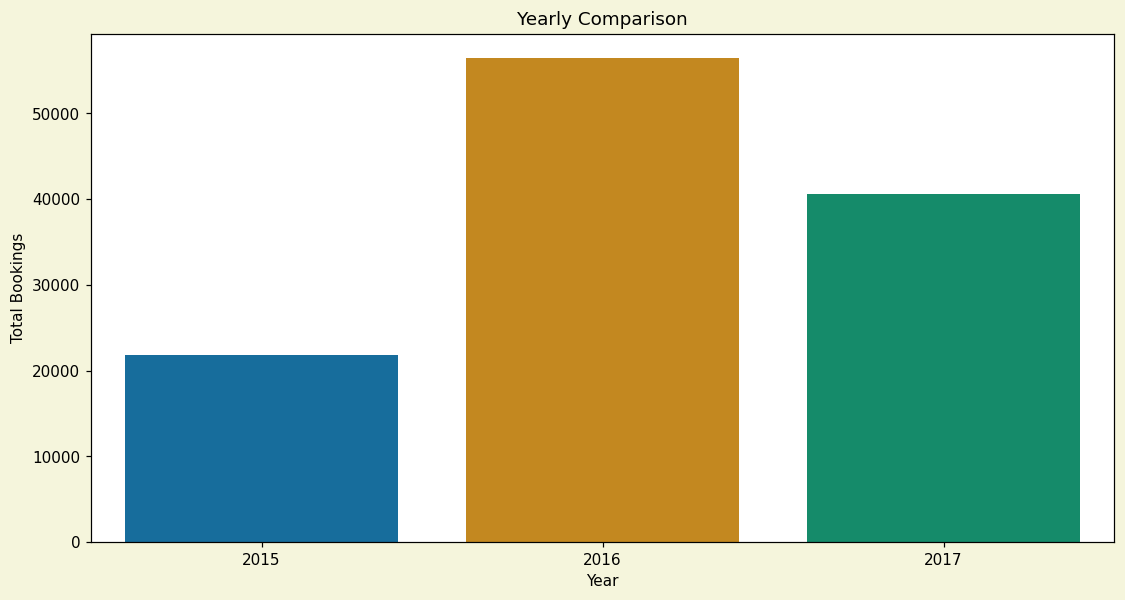

In [385]:
# Plot the graph for comparing year with total bookings done
plt.figure(figsize = (12,6), dpi=110,facecolor='#f5f5dc')
sns.countplot(x='arrival_date_year', data=df, palette='colorblind')
plt.title('Yearly Comparison')
plt.xlabel('Year')
plt.ylabel('Total Bookings')

Text(0, 0.5, 'Count')

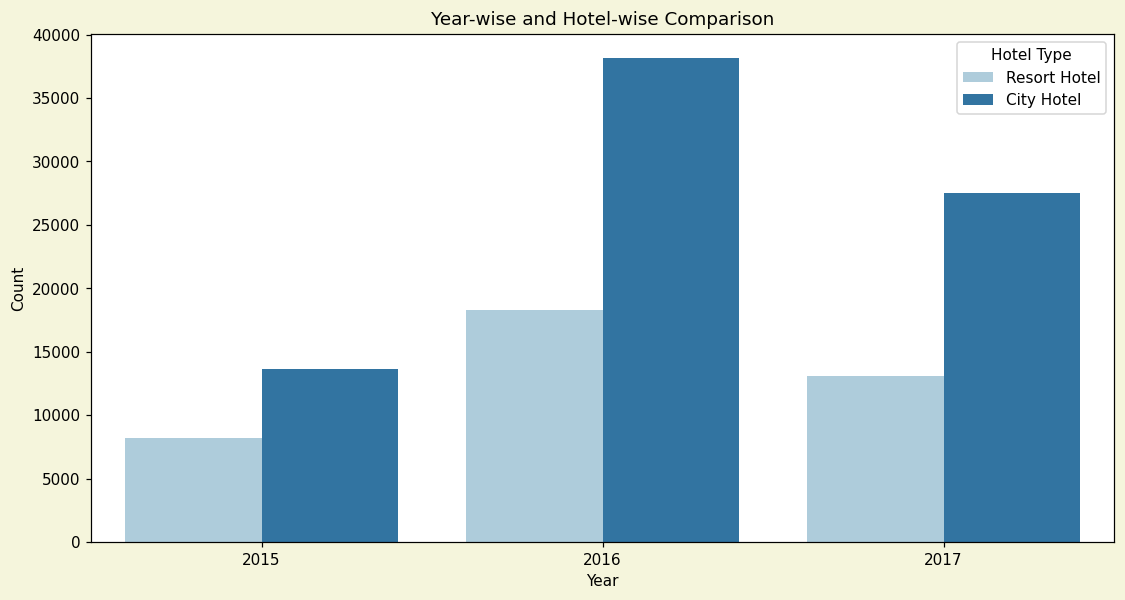

In [386]:
# Plot the graph by grouping by on hotel type for comparing year with total bookings done
plt.figure(figsize = (12,6), dpi=110,facecolor='#f5f5dc')
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette='Paired')
plt.title('Year-wise and Hotel-wise Comparison')
plt.legend(title='Hotel Type')
plt.xlabel('Year')
plt.ylabel('Count')

###  How Long People Stay in the hotel?

In [387]:
# Let us find out night stay duration of customers
total_nights_stays = (df['stays_in_weekend_nights']+ df['stays_in_week_nights']).value_counts().head(10).sort_index()
total_nights_stays

1     20796
2     27531
3     27025
4     17363
5      7765
6      3850
7      8634
8      1157
10     1135
14      913
Name: count, dtype: int64

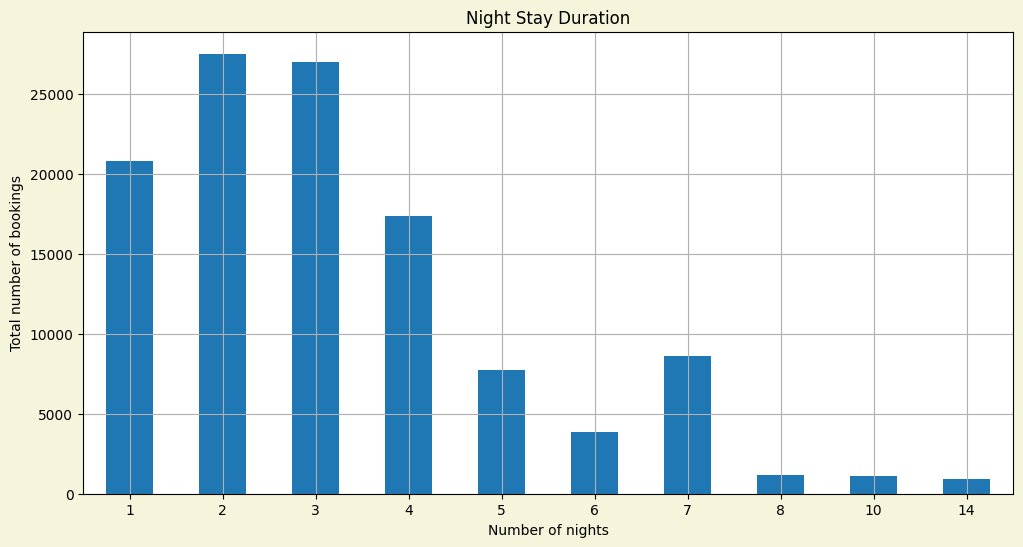

In [388]:
# Plot the graph of number of nights people wants to stay against total number of bookings
plt.rcParams['figure.figsize'] = (12,6)
fig = plt.figure(facecolor='#f5f5dc')
ax = fig.add_subplot(111)
total_nights_stays.plot(kind='bar', ax=ax)
ax.grid()
ax.set_title('Night Stay Duration')
ax.set_ylabel('Total number of bookings')
ax.set_xlabel('Number of nights')
ax.set_xticks(range(len(total_nights_stays.index)))
ax.set_xticklabels(total_nights_stays.index, rotation=0)
plt.show()

*   Hầu hết khách hàng thích ở lại một, hai, ba và bốn đêm, trong đó số lượng đặt phòng cho hai và ba đêm có nhu cầu cao nhất.
*   Nếu chúng ta cố gắng phân tích thời gian lưu trú tối ưu để có được giá hàng ngày tốt nhất, chúng ta có thể nói rằng việc ở lại từ hai đến bốn ngày có thể hợp lý hơn vì nhiều người cũng thích thời gian lưu trú như vậy. Các khách sạn cũng tung ra các ưu đãi cho thời gian lưu trú trung hạn vì các ưu đãi cho thời gian lưu trú dài hạn sẽ tiêu tốn phòng của họ và khách hàng mới không thể đặt phòng, dẫn đến khách sạn có thể không tạo ra được lợi nhuận thêm.

Text(0, 0.5, 'Count')

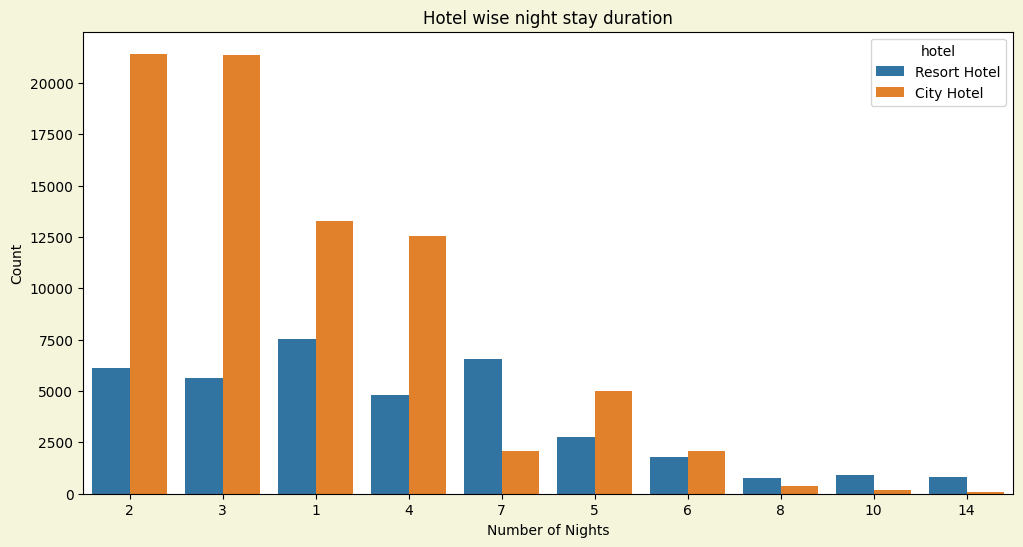

In [389]:
# Observing peoples interest to stay according to type of hotel with graph
df.loc[:,'total_nights'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6),facecolor='#f5f5dc')
sns.countplot(x='total_nights', hue='hotel', data=df, order = df.total_nights.value_counts().iloc[:10].index)
ax.set_title('Hotel wise night stay duration')
ax.set_xlabel('Number of Nights')
ax.set_ylabel('Count')

*   Theo biểu đồ trực quan này, mọi người quan tâm đến việc lưu trú tại khách sạn thành phố trong hai, ba, một và bốn ngày, trong khi đối với khách sạn nghỉ dưỡng, mọi người quan tâm đến việc lưu trú trong một, bảy, hai và ba ngày.

### Most booked accommodation type - Single, Couple, Family

In [390]:
# Select single, couple, multiple adults and family
df_not_canceled = df[df['is_canceled'] == 0]

# Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults == 1) & (df_not_canceled.children == 0) & (df_not_canceled.babies == 0)]
couple   = df_not_canceled[(df_not_canceled.adults == 2) & (df_not_canceled.children == 0) & (df_not_canceled.babies == 0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

In [391]:
# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

# Creating a dictionary to make a DataFrame
d = {'names':names,'count_percent':count_percent}
acc_type = pd.DataFrame(data = d)

In [392]:
# Showing the DataFrame
acc_type

,names,count_percent
0,Single,21.064954
1,Couple (No Children),65.569603
2,Family / Friends,12.693826


Text(0, 0.5, 'Booking (%)')

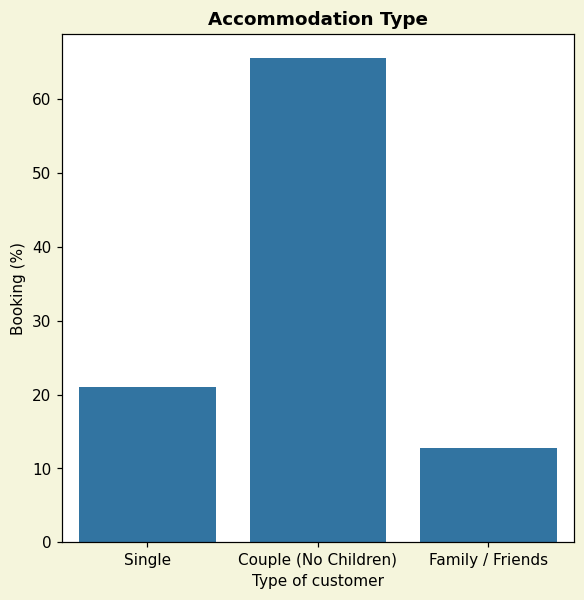

In [393]:
# Plotting the graph between acommodation type and their percentage of customer
plt.figure(figsize = (6,6), dpi=110,facecolor='#f5f5dc')
sns.barplot(data = acc_type, x = 'names', y = 'count_percent')
plt.title('Accommodation Type', weight = 'bold')
plt.xlabel('Type of customer')
plt.ylabel('Booking (%)')

*   Từ biểu đồ, có thể thấy rằng số lượng khách hàng lớn nhất là những khách hàng cặp đôi(không có trẻ em).
*   Những khách hàng gia đình hoặc nhóm bạn có số lượng khách hàng thấp nhất.

### Arriving Year, Leadtime and Cancellations

Text(0, 0.5, 'Lead Time')

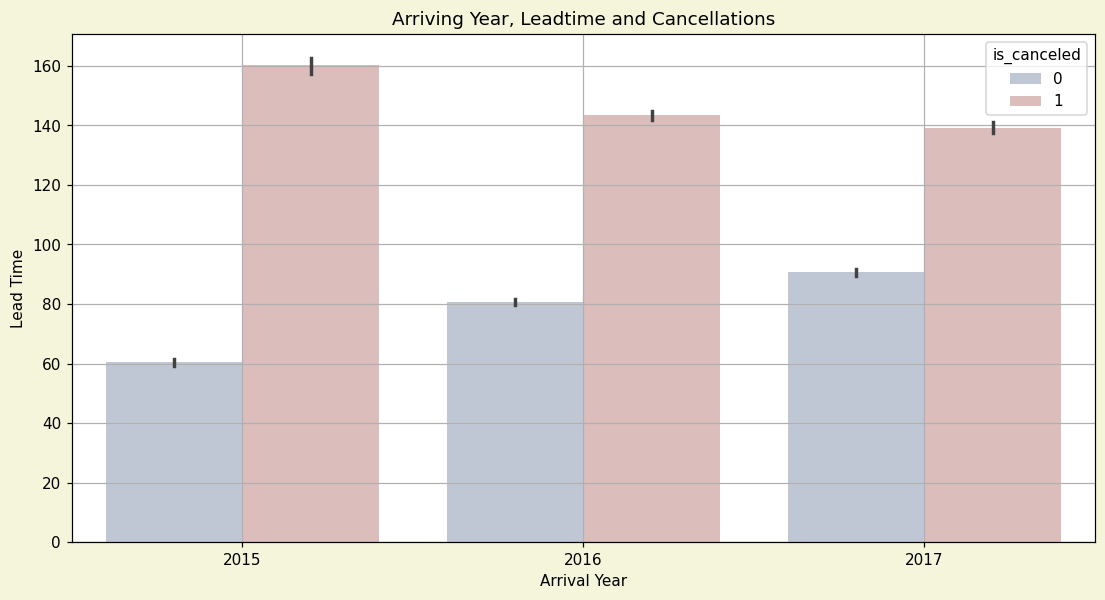

In [394]:
# Plotting the graph by grouping by on is_canceled for comparison between Year and Lead Time
plt.figure(figsize = (12,6), dpi=110,facecolor='#f5f5dc')
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette='vlag')
plt.grid()
plt.title('Arriving Year, Leadtime and Cancellations')
plt.xlabel('Arrival Year')
plt.ylabel('Lead Time')

Text(0, 0.5, 'Count')

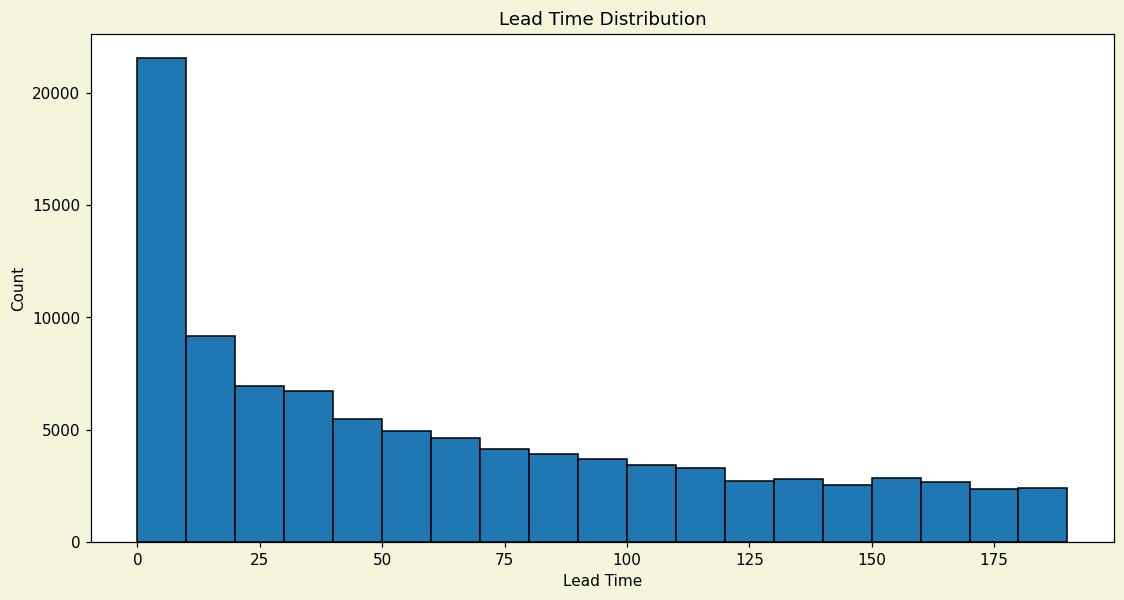

In [395]:
# Plotting the histogram of lead time using bins from 0 to 200 using 10 steps
plt.figure(figsize = (12,6), dpi=110,facecolor='#f5f5dc')
plt.hist(df.lead_time, bins= np.arange(0,200,10), align = 'mid', edgecolor='black')
plt.title('Lead Time Distribution')
plt.xlabel("Lead Time")
plt.ylabel('Count')

Text(0, 0.5, 'Mean (%)')

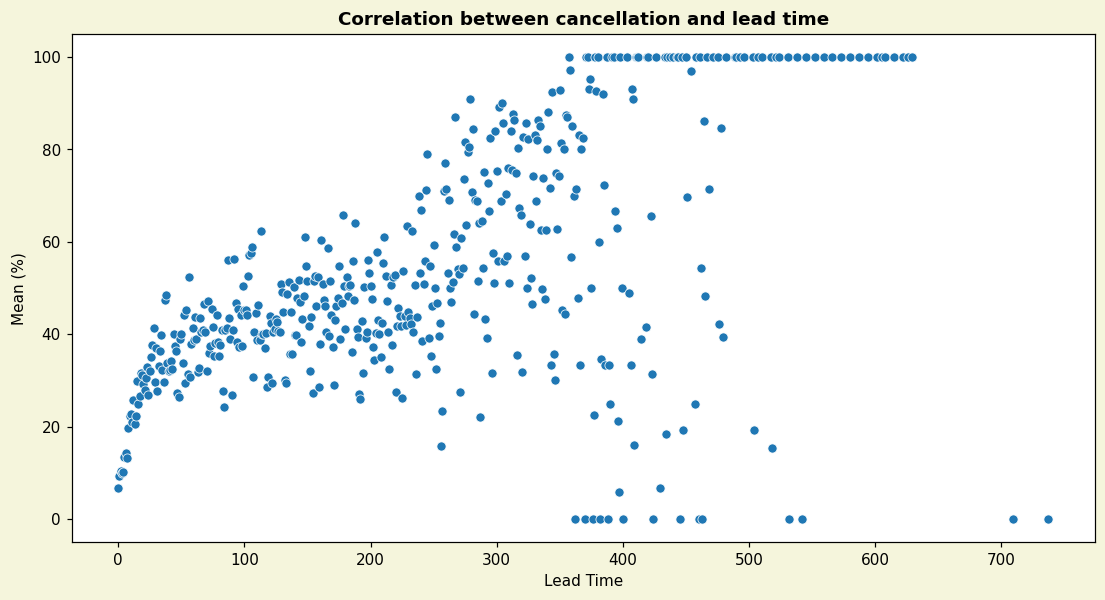

In [396]:
# Plotting the correlation between cancellation and lead time
plt.figure(figsize = (12,6), dpi=110,facecolor='#f5f5dc')
a = df.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)
plt.title('Correlation between cancellation and lead time', weight = 'bold')
plt.xlabel('Lead Time')
plt.ylabel('Mean (%)')

*   Thời gian đặt trước càng dài thì tỷ lệ hủy đặt chỗ càng cao
*   Theo biểu đồ, có thể thấy rằng thời gian đặt trước có mối tương quan dương với việc hủy đặt chỗ.

### Arriving Date and Week Number

Text(0, 0.5, 'Count')

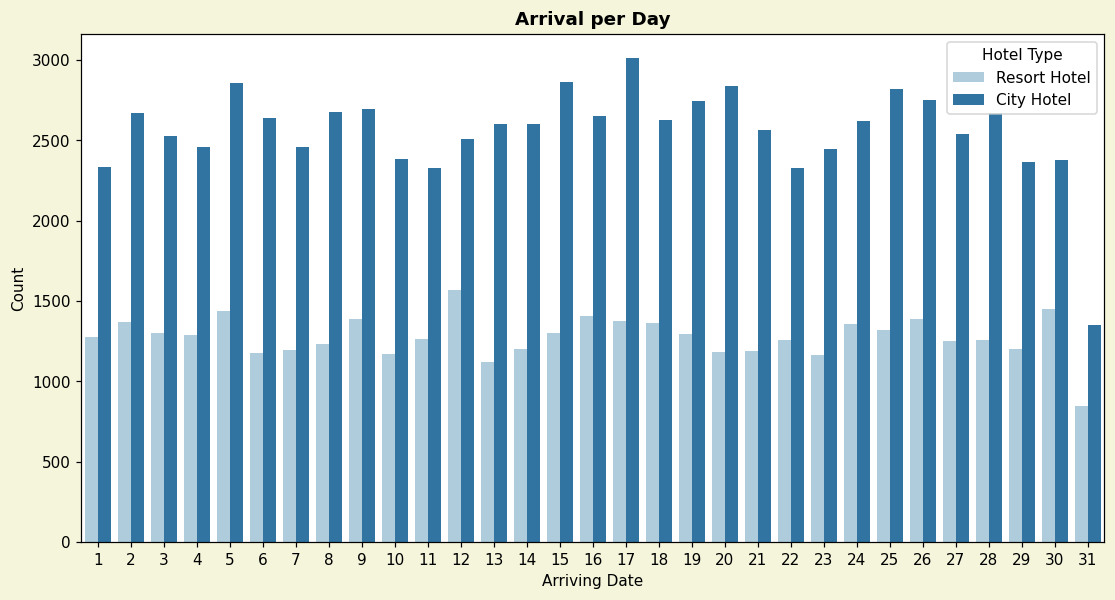

In [397]:
# Plotting the count plot for arrivals per day on different types of hotel
plt.figure(figsize = (12,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x='arrival_date_day_of_month', hue='hotel', data=df, palette='Paired')
plt.title('Arrival per Day', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arriving Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

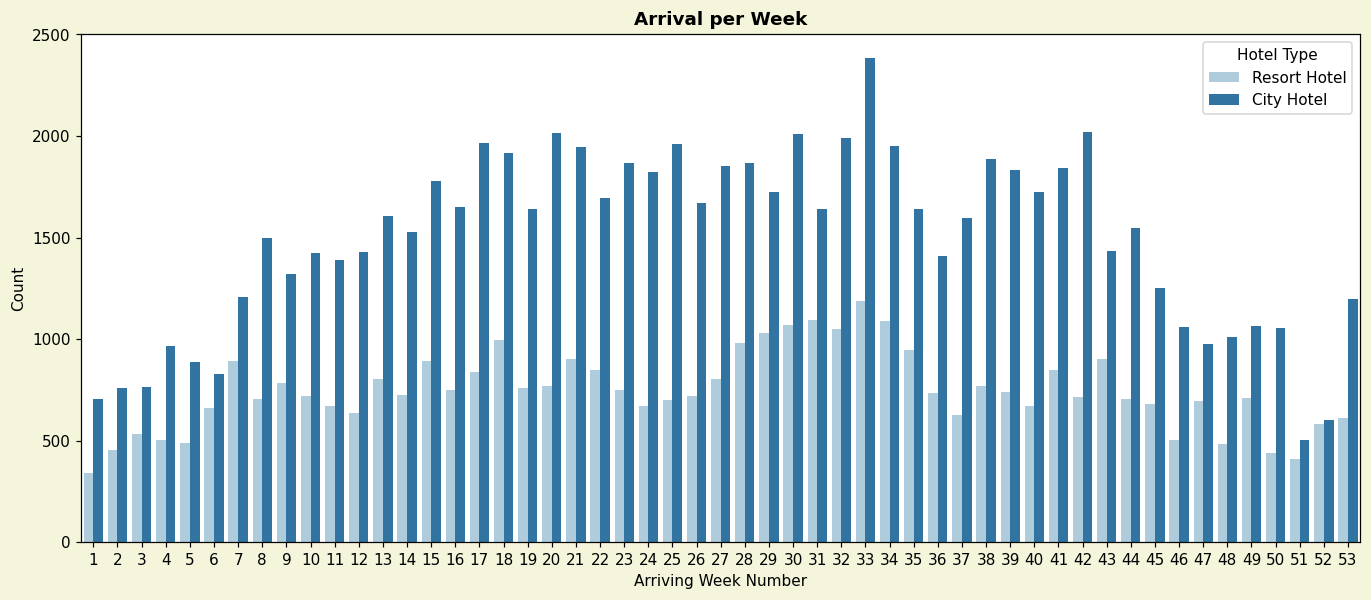

In [398]:
# Plotting the count plot for arrivals per week on different types of hotel
plt.figure(figsize = (15,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x='arrival_date_week_number', hue='hotel', data=df, palette='Paired')
plt.title('Arrival per Week', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arriving Week Number')
plt.ylabel('Count')

*   Khách hàng thích khách sạn thành phố hơn khách sạn nghỉ dưỡng

### Which is the busiest month for hotels?

In [399]:
# Percentage distribution of monthly arrivals
df['arrival_date_month'].value_counts(normalize=True) * 100

arrival_date_month
August       11.653392
July         10.620600
May           9.906561
October       9.331292
April         9.289241
June          9.189998
September     8.803122
March         8.190007
February      6.738379
November      5.678674
December      5.658489
January       4.940244
Name: proportion, dtype: float64

<ipython-input-400-13944e38a2ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'arrival_date_month', data = df, order = df['arrival_date_month'].value_counts().index, palette='Blues_r')


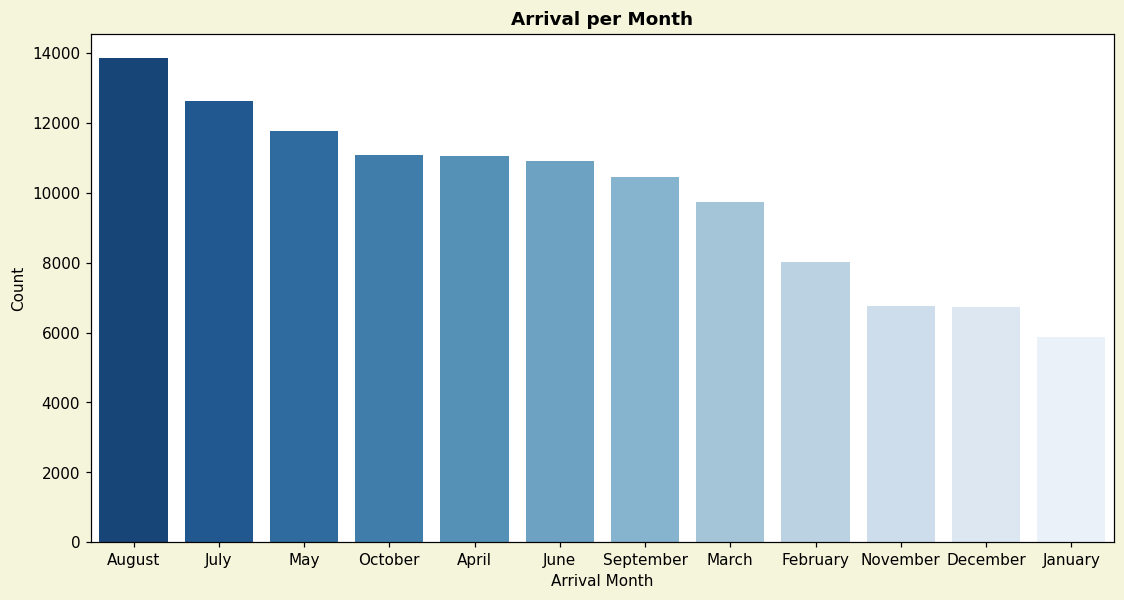

In [400]:
# Plotting the count plot for arrivals per month
plt.figure(figsize = (12,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'arrival_date_month', data = df, order = df['arrival_date_month'].value_counts().index, palette='Blues_r')
plt.title('Arrival per Month', weight='bold')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.show();

*   Số lượng khách hàng cao nhất vào tháng Tám.

*   Vì tháng Một có lượng đặt phòng thấp nhất, nên đây có thể là thời điểm tốt nhất trong năm để đặt phòng khách sạn. Do nhu cầu về phòng thấp, chi phí cho phòng hàng ngày cũng thấp hơn so với các tháng khác, trong khi tháng Tám có nhu cầu về phòng cao nên rõ ràng chi phí cho phòng cũng ở mức cao nhất.



Text(0, 0.5, 'Count')

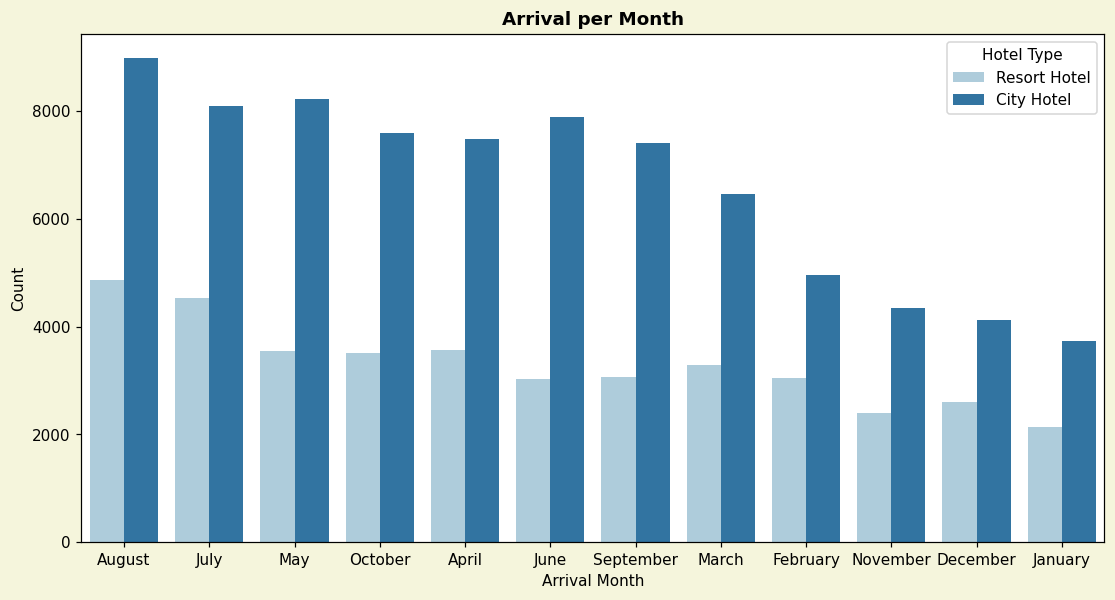

In [401]:
# Plotting the count plot for arrivals per month on different types of hotel
plt.figure(figsize = (12,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'arrival_date_month', data = df, hue ='hotel', order = df['arrival_date_month'].value_counts().index,  palette='Paired')
plt.title('Arrival per Month', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Count')

*   Tháng Tám là tháng bận rộn nhất (có số lượng đặt phòng nhiều nhất)


### Which month have lowest/highest booking rates

In [402]:
# Grouping the arrival accoridng to the month and finding the mean of ADR
df.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack()

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,111.311363,78.144752
August,114.680455,186.914071
December,88.890845,69.182586
February,85.088278,55.445661
January,82.628986,49.673157
July,110.734292,155.491181
June,119.074341,110.566192
March,91.821162,57.802130
May,121.638560,78.820186


Text(0, 0.5, 'ADR (Arrival Daily Rate)')

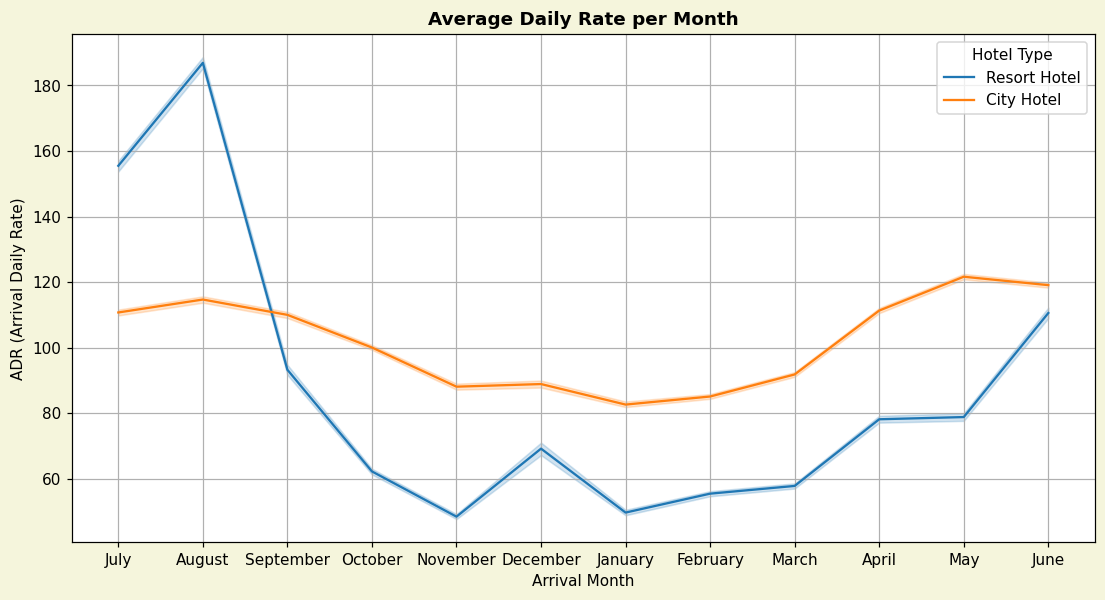

In [403]:
# Plotting the graph between ADR (Arrival Daily Rate) and Arrival Month
plt.figure(figsize = (12,6), dpi=110, facecolor='#f5f5dc')
sns.lineplot(x = 'arrival_date_month', y='adr', data = df, hue ='hotel')
plt.grid()
plt.title('Average Daily Rate per Month', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('ADR (Arrival Daily Rate)')

*   Giá tại khách sạn nghỉ dưỡng(Resort Hotel) cao hơn nhiều trong tháng Tám

*   Giá tại khách sạn thành phố (City Hotel) biến động ít hơn so với khách sạn nghỉ dưỡng(Resort Hotel)

### No. of customer who repeated their bookings

In [404]:
# Percentage distribution of repeated guests
df['is_repeated_guest'].value_counts(normalize=True) * 100

is_repeated_guest
0    96.799018
1     3.200982
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

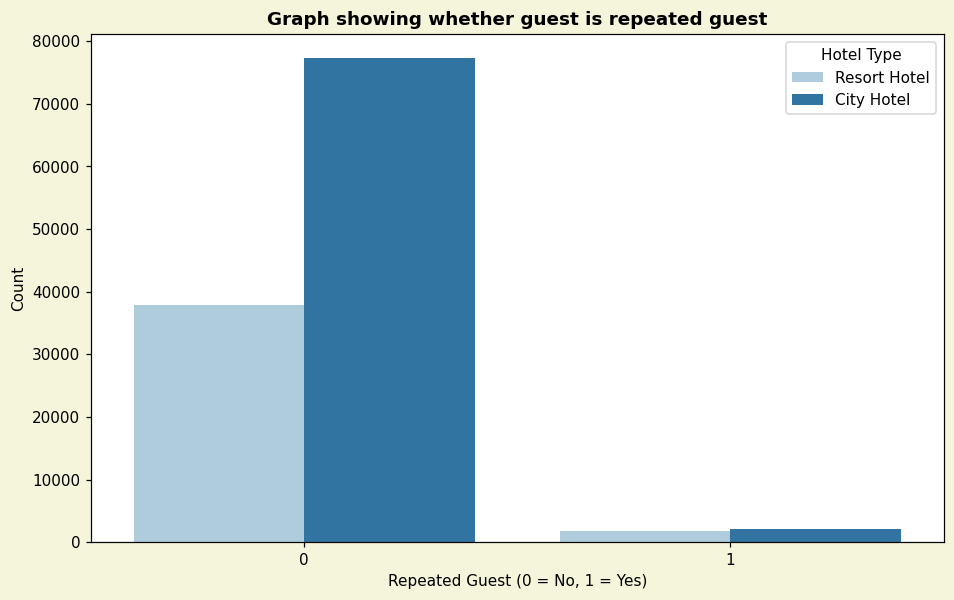

In [405]:
# Plotting the graph showing the count of customers for different hotel whether they are repeated guest or not
plt.figure(figsize = (10,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'is_repeated_guest', data = df, hue ='hotel',  palette='Paired')
plt.title('Graph showing whether guest is repeated guest', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Count')

*   Có khoảng 3.2% là khách hàng tái đặt phòng và khoảng 96.8% là khách hàng mới



### Top 10 Countries of Origin

In [406]:
# Total number of different countries
print(f"Total number of different countries containing customer from: {df['country'].nunique()}")

Total number of different countries containing customer from: 177


In [407]:
# Fetching top 10 countries of maximum customers
country_counts = df['country'].value_counts().head(10)
country_counts

country
PRT    48589
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [408]:
df['country'].value_counts(normalize=True).head(10) * 100

country
PRT    40.865089
GBR    10.200923
FRA     8.759388
ESP     7.205995
DEU     6.128628
ITA     3.167341
IRL     2.838496
BEL     1.969706
BRA     1.870464
NLD     1.769539
Name: proportion, dtype: float64

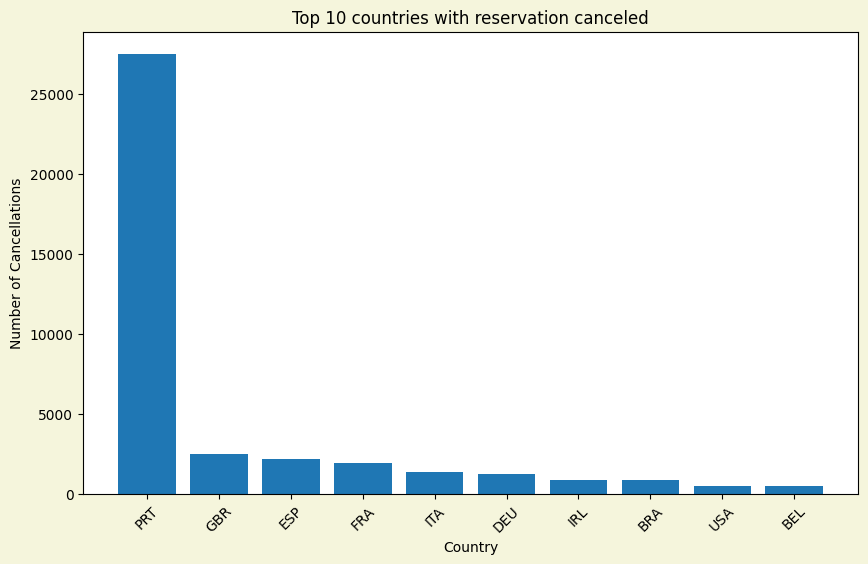

In [409]:
# Plot the graph for maximum number of customers from top 10 different countries
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]


plt.figure(figsize=(10, 6), facecolor='#f5f5dc')
plt.title('Top 10 countries with reservation canceled', color="black")
plt.bar(top_10_country.index, top_10_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


*   Bồ Đào Nha là quốc gia có số lượng đặt phòng nhiều nhất với khoảng 40.9%


### Customer Type

In [410]:
# Percentage distribution of Customer type
df['customer_type'].value_counts(normalize=True) * 100

customer_type
Transient          74.997687
Transient-Party    21.094860
Contract            3.428062
Group               0.479390
Name: proportion, dtype: float64

In [411]:
# Ensuring the type of customer
customer_type = df.customer_type.value_counts()
customer_type

customer_type
Transient          89173
Transient-Party    25082
Contract            4076
Group                570
Name: count, dtype: int64

<ipython-input-412-262d9d0d90e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'customer_type', data = df, order = df['customer_type'].value_counts().index, palette='colorblind')


Text(0, 0.5, 'Customer Count')

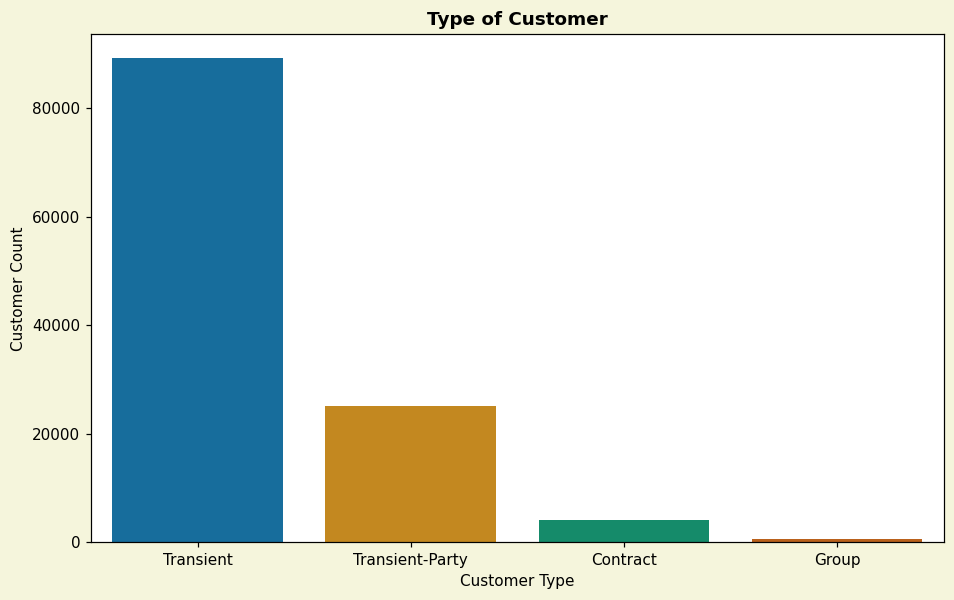

In [412]:
# Plotting the graph showing the count of different types of Customer booking their reservation
plt.figure(figsize = (10,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'customer_type', data = df, order = df['customer_type'].value_counts().index, palette='colorblind')
plt.title('Type of Customer', weight='bold')
plt.xlabel('Customer Type')
plt.ylabel('Customer Count')

*  Từ biểu đồ trên, chúng ta có thể thấy rằng 75% khách hàng là loại khách lưu trú tạm thời, chiếm 3/4 tổng số khách hàng. Và 21% khách hàng là loại khách lưu trú tạm thời theo nhóm.

Text(0.5, 1.0, 'Type of Customer')

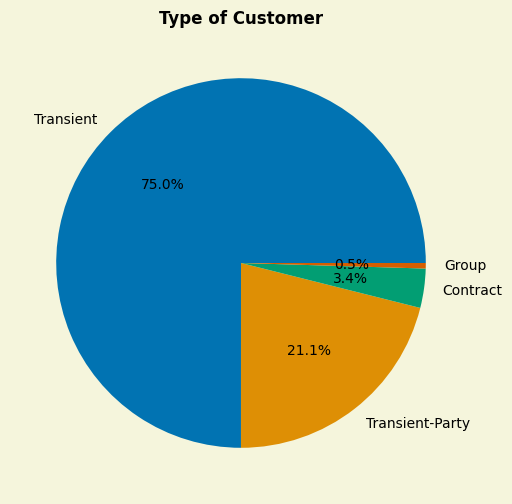

In [413]:
plt.figure(figsize=(6,6), facecolor='#f5f5dc')
plt.pie(customer_type, labels=customer_type.index, autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.title('Type of Customer', weight='bold')

Loại khách hàng đặt phòng:
1.   **Contract** — khi đặt phòng có sự phân bổ hoặc loại hợp đồng khác liên quan đến nó
2.   **Group** — khi đặt phòng liên quan đến một nhóm
3.   **Transient** — khi đặt phòng không phải là một phần của nhóm hoặc hợp đồng, và không liên quan đến các đặt phòng tạm thời khác
4.   **Transient-party** — khi đặt phòng tạm thời, nhưng liên quan đến ít nhất một đặt phòng tạm thời khác





Loại khách hàng tạm thời là nguồn chính của các đặt phòng vì hơn 75% số đặt phòng đến từ loại này, sau đó là Transient-party, Contract và Group lần lượt được chú ý đến.

### Distribution Channel

In [414]:
# Percentage distribution of Distribution Channel
df['distribution_channel'].value_counts(normalize = True) * 100

distribution_channel
TA/TO        82.193590
Direct       12.180722
Corporate     5.459164
GDS           0.162320
Undefined     0.004205
Name: proportion, dtype: float64

<ipython-input-415-777d9f6ea64a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'distribution_channel', data = df, order = df['distribution_channel'].value_counts().index, palette='colorblind')


Text(0, 0.5, 'Count')

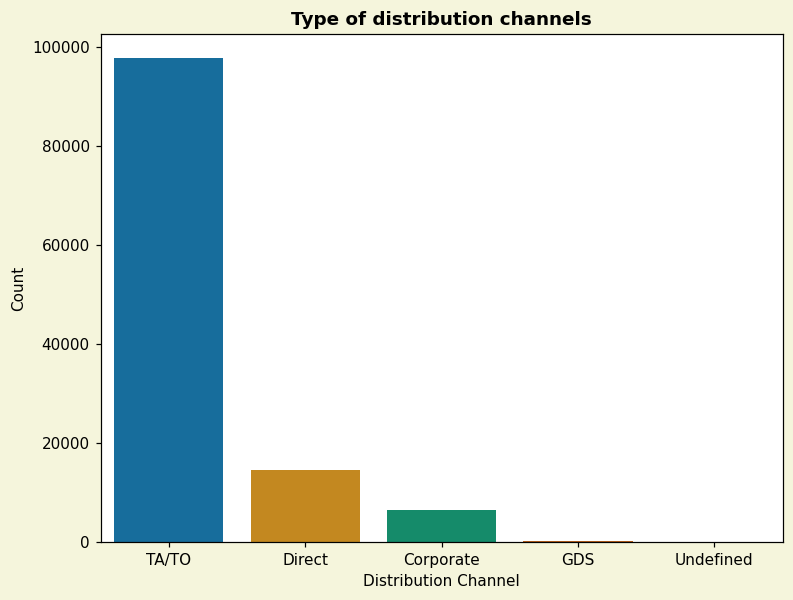

In [415]:
# Plotting the graph showing the type of Distribution Channel used by customer
plt.figure(figsize = (8,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'distribution_channel', data = df, order = df['distribution_channel'].value_counts().index, palette='colorblind')
plt.title('Type of distribution channels', weight='bold')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')

Hầu hết khách hàng đều thích đặt phòng khách sạn thông qua TA/TO (Travel agent / Tour operators) hay (đại lý du lịch / nhà điều hành tour).

### Relationship between ADR and market Segment

In [416]:
# We can find the mean of ADR across market segment per day
df.groupby(['arrival_date_day_of_month','market_segment'])['adr'].mean().unstack()

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
arrival_date_day_of_month,,,,,,,,
1,68.333333,5.068182,63.125882,122.478586,76.229038,85.508725,117.441326,NaN
2,96.000000,0.310345,68.689591,113.968990,74.612910,83.913737,113.228955,NaN
3,112.100000,1.400000,60.395036,107.889951,74.298783,81.890913,114.824869,12.0
4,95.000000,4.767391,69.312792,111.059509,79.997399,80.602023,112.583212,NaN
5,110.250000,0.193548,68.257844,111.602331,71.673768,82.211154,115.702504,18.0
6,95.000000,5.500000,73.473133,107.564679,73.359088,91.062309,115.795880,NaN
7,105.893636,3.391000,66.989157,115.063175,76.641439,86.855759,123.297736,NaN
8,97.769231,0.000000,67.081707,114.676105,70.817007,96.125248,119.222594,NaN
9,105.294118,3.761905,72.008011,106.219181,78.935172,88.095099,117.021528,NaN


Text(0.5, 0, 'Market Segment')

<Figure size 880x660 with 0 Axes>

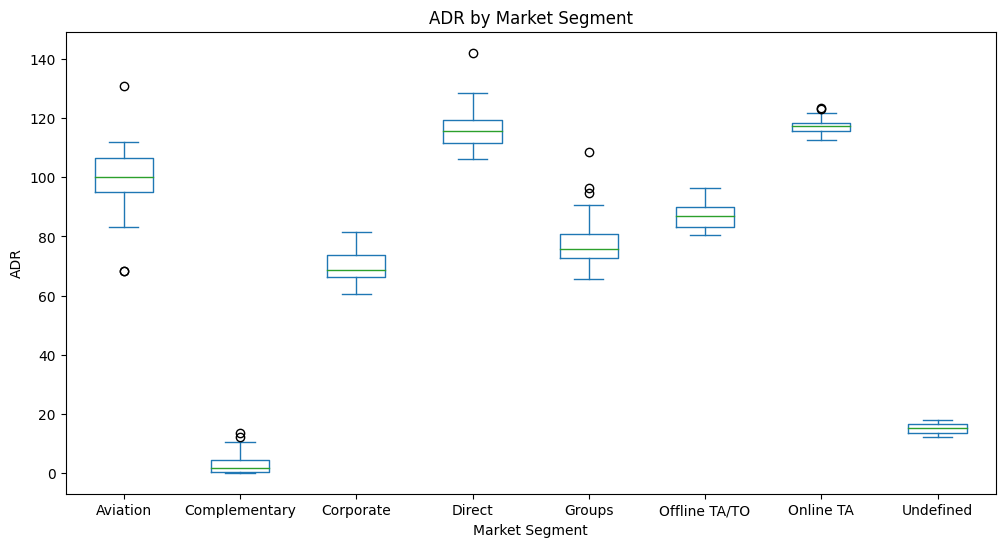

In [417]:
# PLotting the box plot to show how ADR varies across market segment
plt.figure(figsize = (8,6), dpi=110, facecolor='#f5f5dc')
df.groupby(['arrival_date_day_of_month','market_segment'])['adr'].mean().unstack().plot(kind='box')
plt.title('ADR by Market Segment')
plt.ylabel('ADR')
plt.xlabel('Market Segment')


*   Tất cả các phân khúc thị trường đều tuân theo phân phối chuẩn, ngoại trừ phân khúc Complimentary, nơi mà trung vị gần như bằng không. Sự suy luận này được thể hiện qua việc thiếu đi phần râu ở đường dưới của phân khúc Complimentary, điều này chỉ ra một sự giảm sút ở trung vị.



### What is the relationship between market segment and cancellation?

In [418]:
# Percentage Distribution of customers across various market segments
market_segment_customers = df['market_segment'].value_counts(normalize = True) * 100
market_segment_customers

market_segment
Online TA        47.436943
Offline TA/TO    20.318584
Groups           16.657555
Direct           10.470055
Corporate         4.298534
Complementary     0.617320
Aviation          0.199325
Undefined         0.001682
Name: proportion, dtype: float64

Text(0.5, 0, 'Market Segment')

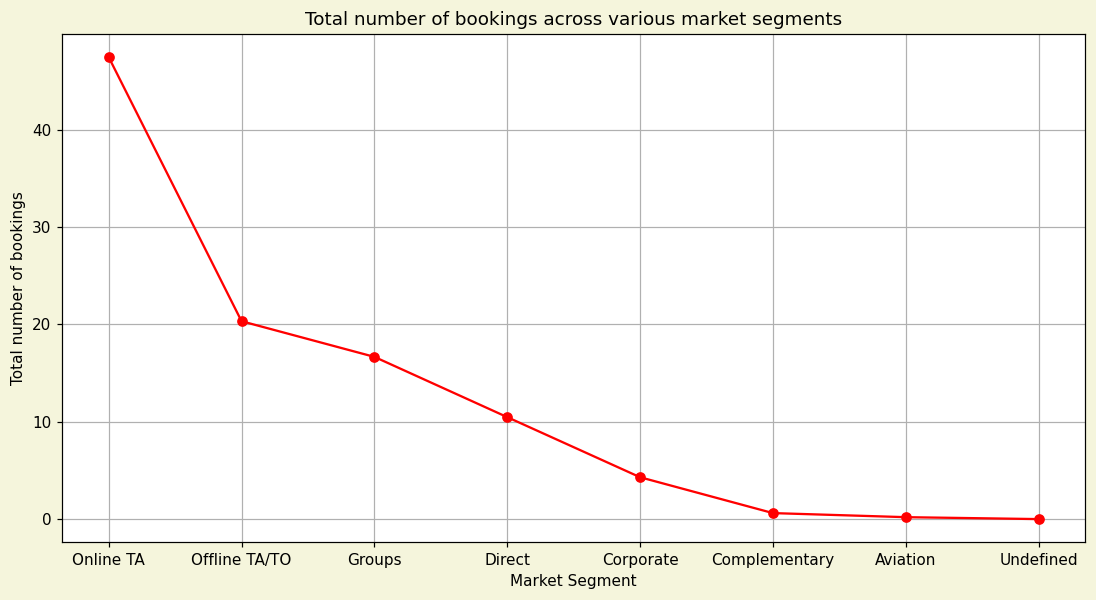

In [419]:
# Plotting market segments with total number of customers
plt.figure(figsize = (12,6), dpi=110, facecolor='#f5f5dc')
plt.rcParams['figure.figsize'] = (15, 5)
market_segment_customers.plot(kind='line',color='red',marker='o')
plt.grid()
plt.title('Total number of bookings across various market segments')
plt.ylabel('Total number of bookings')
plt.xlabel('Market Segment')

*   Phân khúc Online TA (Travel Agency) mang lại số lượng khách hàng cao.
*   Vì vậy, chúng ta có thể tập trung khu vực tiếp thị của mình vào các trang web của các đại lý du lịch này và làm việc với họ vì phần lớn khách truy cập có xu hướng tìm đến họ.

Text(0, 0.5, 'Count')

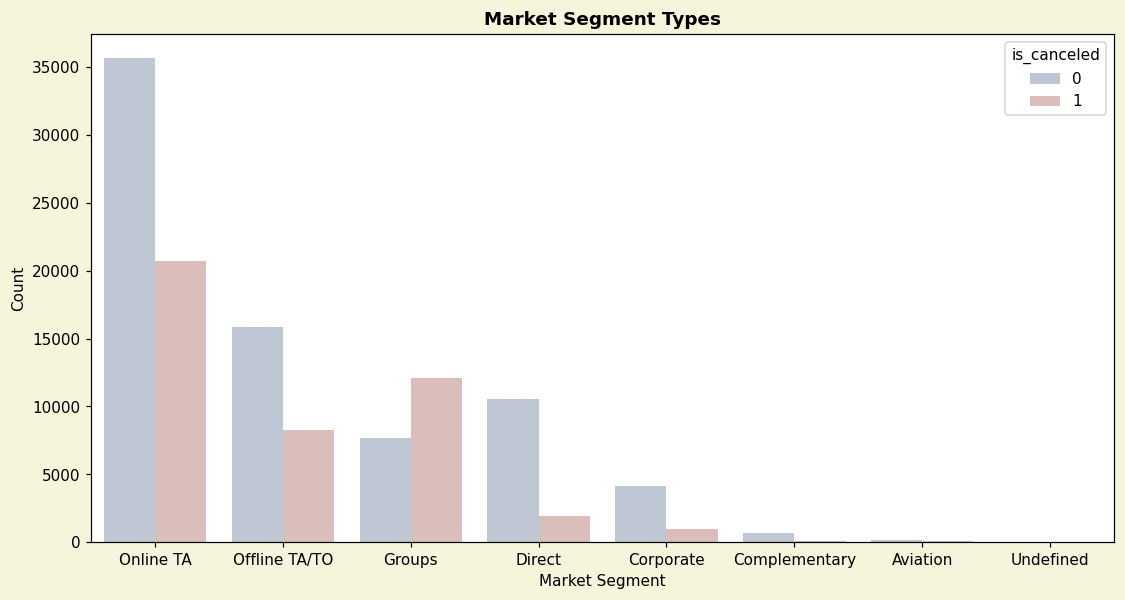

In [420]:
# Plotting the graph showing the count of Customer booking their reservation through various market segment and checking whether they have cancelled thier reservation or not
plt.figure(figsize = (12,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'market_segment', data = df, hue = 'is_canceled',  order = df['market_segment'].value_counts().index, palette='vlag')
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Count')

*   Phân khúc Nhóm có tỷ lệ hủy đặt phòng trên 50%
*   Phân khúc Online TA và Offline TA có tỷ lệ hủy đặt phòng trên 33%
*   Tỷ lệ hủy đặt phòng ở phân khúc trực tiếp (Direct Segment) dưới 20%

### Meal Type

In [421]:
# Analysing the percentage distribution of interest of customer in meal category
meal_cat = df.meal.value_counts(normalize = True) * 100
meal_cat

meal
BB           77.262597
HB           12.139511
SC            8.946939
Undefined     0.979807
FB            0.671147
Name: proportion, dtype: float64

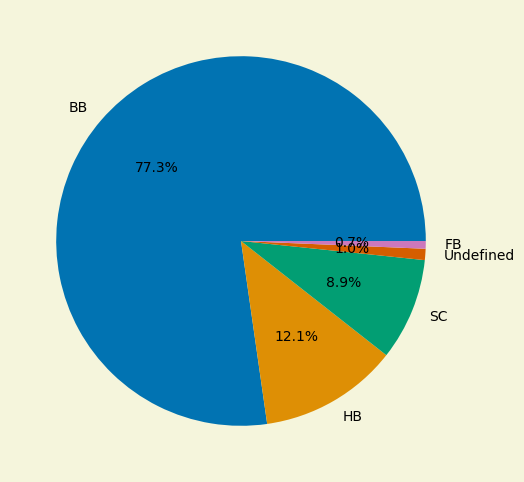

In [422]:
# Plotting the graph showing the interest of customer in different type of meals
plt.figure(figsize=(6, 6), facecolor='#f5f5dc')
plt.pie(meal_cat, labels=meal_cat.index, autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.show()


Loại bữa ăn được đặt:

* Undefined/SC — không có gói bữa ăn
* BB — Chỗ ở và bữa sáng
* HB — Nửa ngày (bữa sáng và một bữa khác - thường là bữa tối)
* FB — Đầy đủ bữa ăn (bữa sáng, bữa trưa và bữa tối)

Loại bữa ăn BB (Chỗ ở và bữa sáng) là loại được ưa chuộng nhất trong tất cả các loại khách hàng.

### Number of Car Parking Space Required

In [423]:
# Percentage Distribution of parking space required by the customers
df['required_car_parking_spaces'].value_counts(normalize=True) * 100

required_car_parking_spaces
0    93.852028
1     6.120218
2     0.023549
3     0.002523
8     0.001682
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

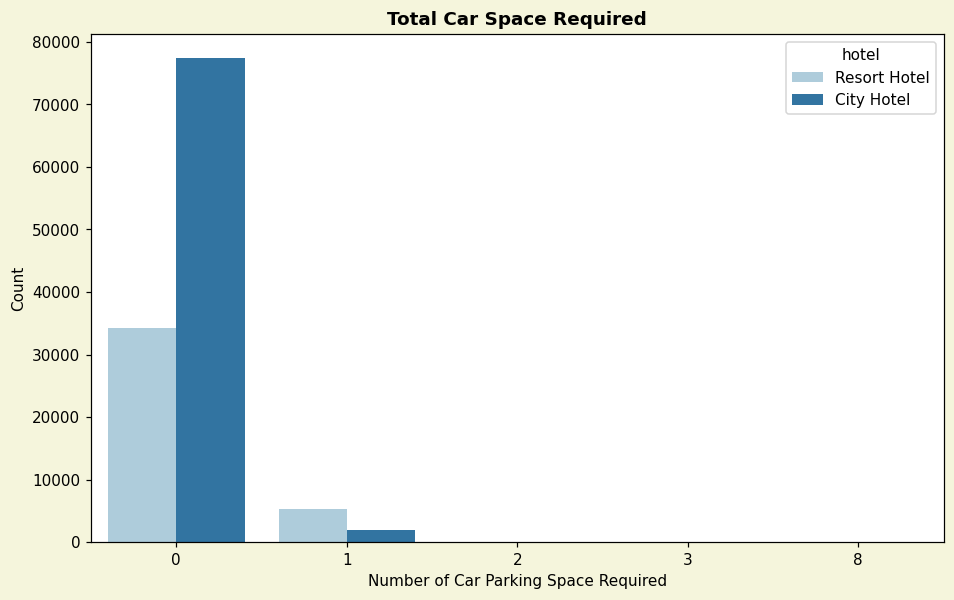

In [424]:
# PLotting the graph showing the number of parking spaces required by customer and their count
plt.figure(figsize = (10,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'required_car_parking_spaces', data = df, hue ='hotel',  palette='Paired')
plt.title('Total Car Space Required', weight='bold')
plt.xlabel('Number of Car Parking Space Required')
plt.ylabel('Count')



*  Biểu đồ này cho thấy rằng 93,8% khách hàng không yêu cầu chỗ đậu xe. Số lượng chỗ đậu xe tối đa được yêu cầu là 1, chiếm 6,1% số khách hàng. Trong số 6,1% này, phần lớn khách hàng lưu trú tại khách sạn nghỉ dưỡng so với khách sạn thành phố.




### Exploring Number of Special Requests

In [425]:
# Percentage Distribution of Special requests required by the customers
df['total_of_special_requests'].value_counts(normalize=True) * 100

total_of_special_requests
0    58.864097
1    27.858470
2    10.868706
3     2.091656
4     0.285111
5     0.031959
Name: proportion, dtype: float64

Text(0, 0.5, 'Reservation Count')

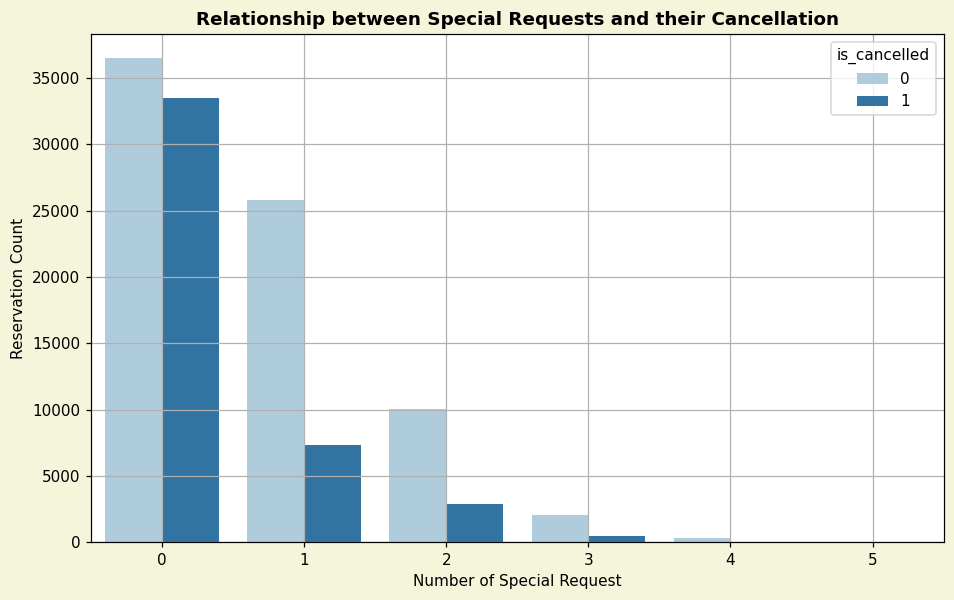

In [426]:
# Plotting the graph to show the relationship between special requests and their cancellation
plt.figure(figsize = (10,6), dpi=110, facecolor='#f5f5dc')
sns.countplot(x = 'total_of_special_requests', data = df, hue ='is_canceled',  palette='Paired')
plt.grid()
plt.title('Relationship between Special Requests and their Cancellation', weight='bold')
plt.legend(title='is_cancelled')
plt.xlabel('Number of Special Request')
plt.ylabel('Reservation Count')

*   Biểu đồ trên mô tả mối quan hệ giữa tổng số yêu cầu đặc biệt và tình trạng hủy đặt phòng.
*   Khoảng 28% số đặt phòng bị hủy mà không có bất kỳ yêu cầu đặc biệt nào từ khách, tiếp theo là 6% số đặt phòng bị hủy có một yêu cầu đặc biệt từ khách.



## Feature Selection

In [427]:
# Making a copy of the DataFrame
df_subset = df[['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest',
	               'booking_changes','agent',	'days_in_waiting_list','adr',	'required_car_parking_spaces',
                	'total_of_special_requests','total_nights']]


In [428]:
# Correaltion between the column in df_subset
df_subset.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,1.000000,0.291950,-0.002629,0.024112,0.058406,0.004742,-0.032523,-0.085183,-0.144684,-0.077014,0.054010,0.047225,-0.194800,-0.235589,0.016974
lead_time,0.291950,1.000000,0.083984,0.164780,0.116775,-0.038327,-0.021147,-0.125085,0.000021,-0.064502,0.170008,-0.069034,-0.115553,-0.096564,0.155908
stays_in_weekend_nights,-0.002629,0.083984,1.000000,0.494887,0.090394,0.045429,0.018396,-0.087835,0.062412,0.132484,-0.054568,0.050539,-0.018147,0.071648,0.760955
stays_in_week_nights,0.024112,0.164780,0.494887,1.000000,0.091993,0.044258,0.020157,-0.097994,0.095673,0.170947,-0.002161,0.067549,-0.024378,0.066773,0.940370
adults,0.058406,0.116775,0.090394,0.091993,1.000000,0.029584,0.017885,-0.147496,-0.052430,-0.027312,-0.008767,0.238529,0.016364,0.121845,0.104071
children,0.004742,-0.038327,0.045429,0.044258,0.029584,1.000000,0.024131,-0.032989,0.048666,0.039577,-0.033395,0.341460,0.057062,0.081775,0.050828
babies,-0.032523,-0.021147,0.018396,0.020157,0.017885,0.024131,1.000000,-0.008954,0.083222,0.033706,-0.010648,0.030093,0.036971,0.097596,0.022251
is_repeated_guest,-0.085183,-0.125085,-0.087835,-0.097994,-0.147496,-0.032989,-0.008954,1.000000,0.012168,0.019788,-0.022322,-0.141946,0.077778,0.013144,-0.107550
booking_changes,-0.144684,0.000021,0.062412,0.095673,-0.052430,0.048666,0.083222,0.012168,1.000000,0.059794,-0.011659,0.019069,0.065730,0.052430,0.095865
agent,-0.077014,-0.064502,0.132484,0.170947,-0.027312,0.039577,0.033706,0.019788,0.059794,1.000000,-0.054608,-0.022384,0.151909,0.031714,0.179498


<Axes: >

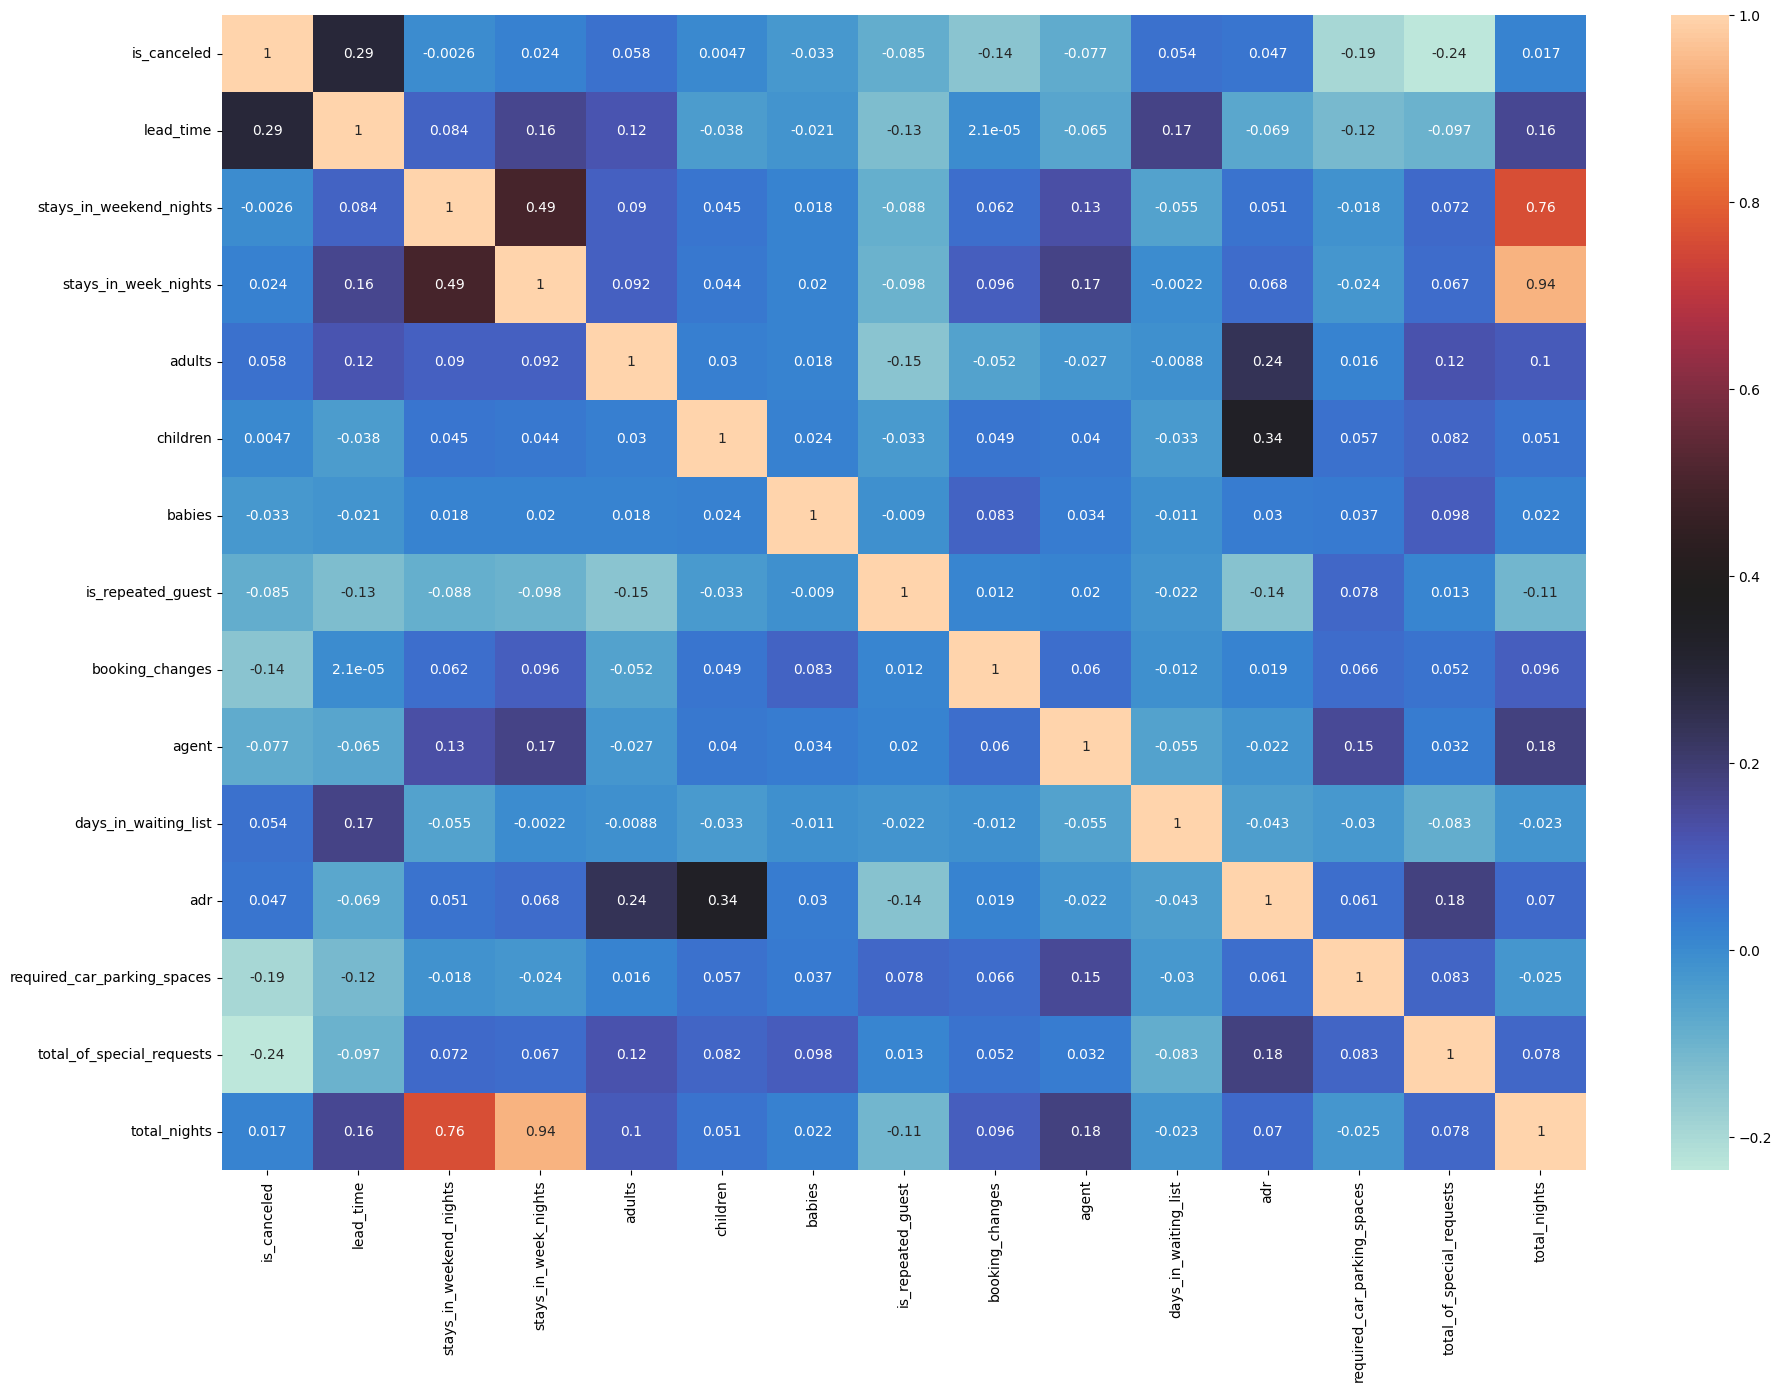

In [429]:
# Plotting a heatmap to show the correlation between the columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax, cmap = "icefire")

## Model Prediction

### Train test split

In [430]:
X = df_subset.drop('is_canceled', axis=1)
y = df_subset['is_canceled']

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Scaling

In [432]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)
scaled = scaler.transform(X_test)

### Random Forest Classifier

In [433]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=140,max_features='auto', max_depth=20)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RFC

              precision    recall  f1-score   support

           0       0.83      0.92      0.88     14827
           1       0.84      0.69      0.76      8954

    accuracy                           0.84     23781
   macro avg       0.84      0.81      0.82     23781
weighted avg       0.84      0.84      0.83     23781


confusion matrix


<Axes: >

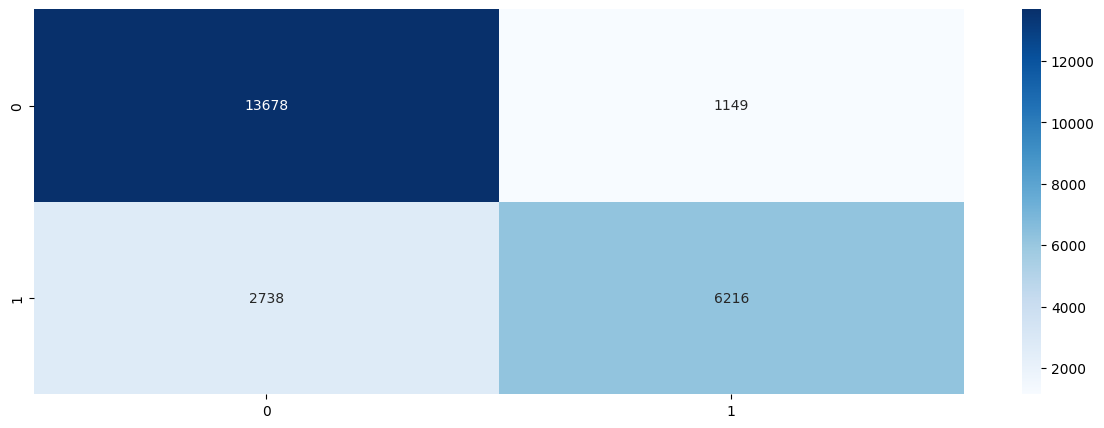

In [434]:
print('RFC' + '\n')
print(classification_report(y_test,rfcpred))
print('\n' + 'confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),annot=True, fmt='g',cmap='Blues')

### KNN Classifier

In [435]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

KNN

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     14827
           1       0.73      0.64      0.68      8954

    accuracy                           0.78     23781
   macro avg       0.77      0.75      0.76     23781
weighted avg       0.77      0.78      0.77     23781


confusion matrix


<Axes: >

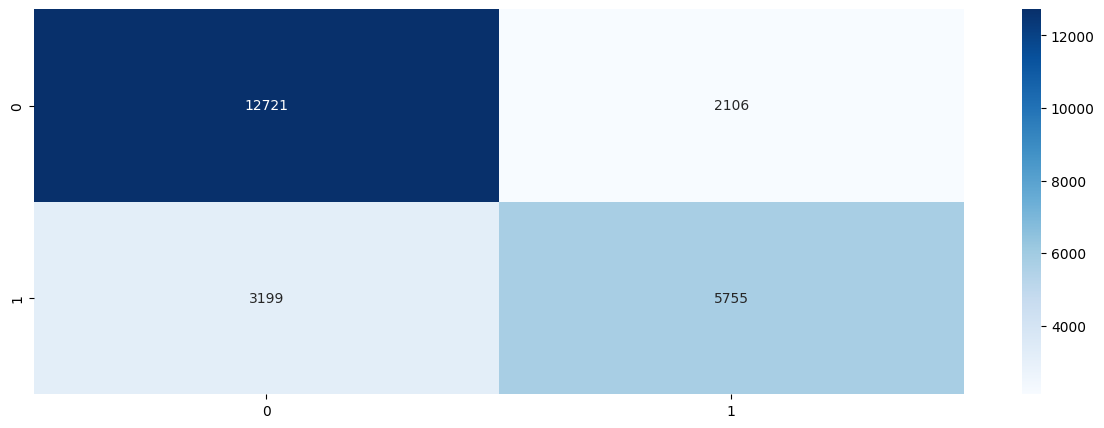

In [436]:
print('KNN' + '\n')
print(classification_report(y_test,knnpred))
print('\n' + 'confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True, fmt='g',cmap='Blues')

### Logistic Regression

In [437]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
lrpredict = lr.predict(X_test)

LR

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     14827
           1       0.67      0.48      0.56      8954

    accuracy                           0.72     23781
   macro avg       0.70      0.67      0.68     23781
weighted avg       0.71      0.72      0.71     23781


confusion matrix:



<Axes: >

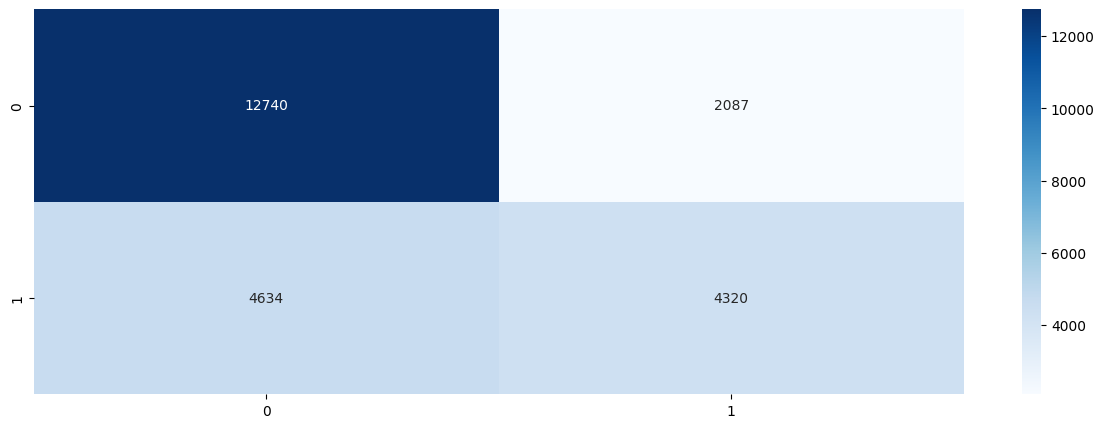

In [438]:
print('LR' + '\n')
print(classification_report(y_test,lrpredict))
print('\n' + 'confusion matrix:' + '\n')
sns.heatmap(confusion_matrix(y_test,lrpredict),annot=True, fmt='g',cmap='Blues')